In [212]:
from PIL import Image


In [213]:
import numpy as np

In [214]:
cat1=Image.open("./cat2.jpeg")

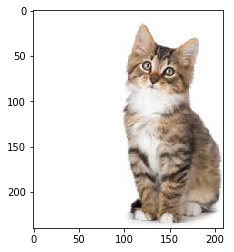

In [215]:
plt.imshow(cat2)

In [216]:
cat2=Image.open("./cat3.jpeg")

In [217]:
basewidth = 400
img = cat1.resize((400,400), Image.ANTIALIAS)
img.save('./cat4.jpeg')

In [218]:
img = cat2.resize((400,400), Image.ANTIALIAS)
img.save('./cat5.jpeg')

In [402]:
cat3=Image.open("./cat4.jpeg")
cat4=Image.open("./cat5.jpeg")

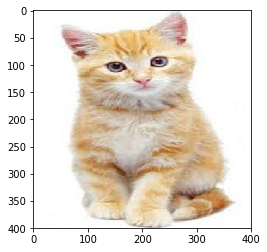

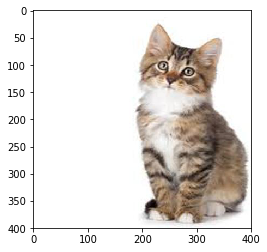

In [403]:
plt.imshow(cat3)
plt.show()
plt.imshow(cat4)
plt.show()


In [404]:
cat1_np=np.asarray(cat3)
cat2_np=np.asarray(cat4)

In [405]:
cat1_np.shape,cat2_np.shape

((400, 400, 3), (400, 400, 3))

In [406]:
#cat1_np_dms=np.resize(cat1_np,(400,400,3))
#cat2_np_dms=np.resize(cat2_np,(400,400,3))

In [407]:
#cat1_np_dms.shape,cat2_np_dms.shape


In [408]:
input_img = np.concatenate([[cat1_np], [cat2_np]], axis=0)

In [409]:
print("Input Img Shape: {}".format(input_img.shape))

Input Img Shape: (2, 400, 400, 3)


In [410]:
num_batch, H, W, C = input_img.shape


In [411]:
#M = np.array([[1., 0., 0.], [0., 1., 0.]])#identity so the output image appears as the same input image
#M=np.array([[1., 0., 0.5], [0., 1., 0.]])#for translation
M=np.array([[0.707, -0.707, 0.], [0.707, 0.707, 0.]])#for rotation


In [412]:
M = np.resize(M, (num_batch, 2, 3))


In [413]:
M.shape

(2, 2, 3)

In [414]:
M,W

(array([[[ 0.707, -0.707,  0.   ],
         [ 0.707,  0.707,  0.   ]],
 
        [[ 0.707, -0.707,  0.   ],
         [ 0.707,  0.707,  0.   ]]]), 400)

In [415]:
x = np.linspace(-1, 1, W)
y = np.linspace(-1, 1, H)
x_t, y_t = np.meshgrid(x, y)

In [416]:
x_t.shape,y_t.shape

((400, 400), (400, 400))

In [417]:
ones = np.ones(np.prod(x_t.shape))
sampling_grid = np.vstack([x_t.flatten(), y_t.flatten(), ones])

In [418]:
ones.shape

(160000,)

In [419]:
x_t.flatten().shape

(160000,)

In [420]:
sampling_grid.shape

(3, 160000)

In [421]:
sampling_grid

array([[-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
         0.99498747,  1.        ],
       [-1.        , -1.        , -1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [422]:
sampling_grid = np.resize(sampling_grid, (num_batch, 3, H*W))

In [423]:
sampling_grid

array([[[-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
          0.99498747,  1.        ],
        [-1.        , -1.        , -1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ]],

       [[-1.        , -0.99498747, -0.98997494, ...,  0.98997494,
          0.99498747,  1.        ],
        [-1.        , -1.        , -1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ]]])

In [424]:
sampling_grid.shape,M.shape

((2, 3, 160000), (2, 2, 3))

In [425]:
batch_grids = np.matmul(M, sampling_grid)

In [426]:
batch_grids.shape

(2, 2, 160000)

In [427]:
batch_grids

array([[[ 0.        ,  0.00354386,  0.00708772, ..., -0.00708772,
         -0.00354386,  0.        ],
        [-1.414     , -1.41045614, -1.40691228, ...,  1.40691228,
          1.41045614,  1.414     ]],

       [[ 0.        ,  0.00354386,  0.00708772, ..., -0.00708772,
         -0.00354386,  0.        ],
        [-1.414     , -1.41045614, -1.40691228, ...,  1.40691228,
          1.41045614,  1.414     ]]])

In [428]:
batch_grids = batch_grids.reshape(num_batch, 2, H, W)

In [429]:
batch_grids.shape

(2, 2, 400, 400)

In [430]:
batch_grids = np.moveaxis(batch_grids, 1, -1)

In [431]:
batch_grids.shape


(2, 400, 400, 2)

In [432]:
batch_grids

array([[[[ 0.00000000e+00, -1.41400000e+00],
         [ 3.54385965e-03, -1.41045614e+00],
         [ 7.08771930e-03, -1.40691228e+00],
         ...,
         [ 1.40691228e+00, -7.08771930e-03],
         [ 1.41045614e+00, -3.54385965e-03],
         [ 1.41400000e+00,  0.00000000e+00]],

        [[-3.54385965e-03, -1.41045614e+00],
         [ 4.24909342e-17, -1.40691228e+00],
         [ 3.54385965e-03, -1.40336842e+00],
         ...,
         [ 1.40336842e+00, -3.54385965e-03],
         [ 1.40691228e+00, -4.24909342e-17],
         [ 1.41045614e+00,  3.54385965e-03]],

        [[-7.08771930e-03, -1.40691228e+00],
         [-3.54385965e-03, -1.40336842e+00],
         [-2.60404341e-17, -1.39982456e+00],
         ...,
         [ 1.39982456e+00, -1.96004171e-16],
         [ 1.40336842e+00,  3.54385965e-03],
         [ 1.40691228e+00,  7.08771930e-03]],

        ...,

        [[-1.40691228e+00, -7.08771930e-03],
         [-1.40336842e+00, -3.54385965e-03],
         [-1.39982456e+00, -1.83025970

In [433]:
x_s = batch_grids[:, :, :, 0:1].squeeze()
y_s = batch_grids[:, :, :, 1:2].squeeze()


In [434]:
x_s.shape,y_s.shape

((2, 400, 400), (2, 400, 400))

In [435]:
x_s

array([[[ 0.00000000e+00,  3.54385965e-03,  7.08771930e-03, ...,
          1.40691228e+00,  1.41045614e+00,  1.41400000e+00],
        [-3.54385965e-03,  4.24909342e-17,  3.54385965e-03, ...,
          1.40336842e+00,  1.40691228e+00,  1.41045614e+00],
        [-7.08771930e-03, -3.54385965e-03, -2.60404341e-17, ...,
          1.39982456e+00,  1.40336842e+00,  1.40691228e+00],
        ...,
        [-1.40691228e+00, -1.40336842e+00, -1.39982456e+00, ...,
         -3.90186352e-17,  3.54385965e-03,  7.08771930e-03],
        [-1.41045614e+00, -1.40691228e+00, -1.40336842e+00, ...,
         -3.54385965e-03,  3.60018337e-17,  3.54385965e-03],
        [-1.41400000e+00, -1.41045614e+00, -1.40691228e+00, ...,
         -7.08771930e-03, -3.54385965e-03,  0.00000000e+00]],

       [[ 0.00000000e+00,  3.54385965e-03,  7.08771930e-03, ...,
          1.40691228e+00,  1.41045614e+00,  1.41400000e+00],
        [-3.54385965e-03,  4.24909342e-17,  3.54385965e-03, ...,
          1.40336842e+00,  1.40691228e

In [436]:
x = ((x_s + 1.) * W) * 0.5
y = ((y_s + 1.) * H) * 0.5

In [437]:
x

array([[[200.        , 200.70877193, 201.41754386, ..., 481.38245614,
         482.09122807, 482.8       ],
        [199.29122807, 200.        , 200.70877193, ..., 480.67368421,
         481.38245614, 482.09122807],
        [198.58245614, 199.29122807, 200.        , ..., 479.96491228,
         480.67368421, 481.38245614],
        ...,
        [-81.38245614, -80.67368421, -79.96491228, ..., 200.        ,
         200.70877193, 201.41754386],
        [-82.09122807, -81.38245614, -80.67368421, ..., 199.29122807,
         200.        , 200.70877193],
        [-82.8       , -82.09122807, -81.38245614, ..., 198.58245614,
         199.29122807, 200.        ]],

       [[200.        , 200.70877193, 201.41754386, ..., 481.38245614,
         482.09122807, 482.8       ],
        [199.29122807, 200.        , 200.70877193, ..., 480.67368421,
         481.38245614, 482.09122807],
        [198.58245614, 199.29122807, 200.        , ..., 479.96491228,
         480.67368421, 481.38245614],
        ...,


In [438]:
x0 = np.floor(x).astype(np.int64)
x1 = x0 + 1
y0 = np.floor(y).astype(np.int64)
y1 = y0 + 1

In [439]:
x0

array([[[200, 200, 201, ..., 481, 482, 482],
        [199, 200, 200, ..., 480, 481, 482],
        [198, 199, 200, ..., 479, 480, 481],
        ...,
        [-82, -81, -80, ..., 200, 200, 201],
        [-83, -82, -81, ..., 199, 200, 200],
        [-83, -83, -82, ..., 198, 199, 200]],

       [[200, 200, 201, ..., 481, 482, 482],
        [199, 200, 200, ..., 480, 481, 482],
        [198, 199, 200, ..., 479, 480, 481],
        ...,
        [-82, -81, -80, ..., 200, 200, 201],
        [-83, -82, -81, ..., 199, 200, 200],
        [-83, -83, -82, ..., 198, 199, 200]]])

In [440]:
x0 = np.clip(x0, 0, W-1)
x1 = np.clip(x1, 0, W-1)
y0 = np.clip(y0, 0, H-1)
y1 = np.clip(y1, 0, H-1)


In [441]:
Ia = input_img[np.arange(num_batch)[:,None,None], y0, x0]
Ib = input_img[np.arange(num_batch)[:,None,None], y1, x0]
Ic = input_img[np.arange(num_batch)[:,None,None], y0, x1]
Id = input_img[np.arange(num_batch)[:,None,None], y1, x1]


In [442]:
#Ia

In [443]:
wa = (x1-x) * (y1-y)
wb = (x1-x) * (y-y0)
wc = (x-x0) * (y1-y)
wd = (x-x0) * (y-y0)

In [444]:
#wa

In [445]:
wa = np.expand_dims(wa, axis=3)
wb = np.expand_dims(wb, axis=3)
wc = np.expand_dims(wc, axis=3)
wd = np.expand_dims(wd, axis=3)

# compute output
out = wa*Ia + wb*Ib + wc*Ic + wd*Id

In [446]:
out[1]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.81898940e-12,  1.81898940e-12,  1.81898940e-12],
        [-1.81898940e-12, -1.81898940e-12, -1.81898940e-12],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 9.09494702e-13,  9.09494702e-13,  9.09494702e-13],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.81898940e-12, -1.81898940e-12, -1.81898940e-12]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,

In [447]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


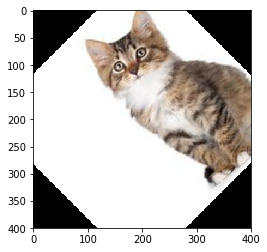

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


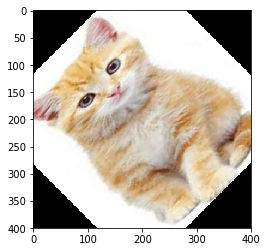

In [449]:
plt.imshow(out[1]/255.0)
plt.show()

plt.imshow(out[0]/255.0)
plt.show()
